In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train data.csv')
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [4]:
# we have missing values for total_bedrooms

In [5]:
data["total_bedrooms"].value_counts(dropna=False)

NaN       176
280.0      46
291.0      41
315.0      41
287.0      40
         ... 
1995.0      1
2190.0      1
1555.0      1
1172.0      1
1183.0      1
Name: total_bedrooms, Length: 1829, dtype: int64

In [6]:
# we have exactly 176 missing values for "total_bedroom" column

In [7]:
# vérification des duplicate
data.duplicated().sum()

0

In [8]:
ocean = data['ocean_proximity'].value_counts()
ocean

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [9]:
# Convert distance from ocean by numeric values as:
# less 1h from ocean = 1 // INLAND = 2 // NEAR OCEAN = 3 // NEAR BAY = 4 // ISLAND = 5

In [10]:
data["blue_near"] = data.ocean_proximity.apply(lambda x: 1 if x == "<1H OCEAN"
                          else 2 if x == "INLAND" else
                          3 if x == "NEAR OCEAN" else
                          4 if x == "NEAR BAY" else
                          5 if x == "ISLAND" else
                          "NaN")

In [11]:
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,blue_near
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,2
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,1
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,2
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,1
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,2
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,4
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,2
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,1


In [12]:
data = data.drop(["Unnamed: 0","ocean_proximity"], axis = 1)


In [13]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,blue_near
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1


# check the outliers

longitude                AxesSubplot(0.125,0.653529;0.168478x0.226471)
latitude              AxesSubplot(0.327174,0.653529;0.168478x0.226471)
housing_median_age    AxesSubplot(0.529348,0.653529;0.168478x0.226471)
total_rooms           AxesSubplot(0.731522,0.653529;0.168478x0.226471)
total_bedrooms           AxesSubplot(0.125,0.381765;0.168478x0.226471)
population            AxesSubplot(0.327174,0.381765;0.168478x0.226471)
households            AxesSubplot(0.529348,0.381765;0.168478x0.226471)
median_income         AxesSubplot(0.731522,0.381765;0.168478x0.226471)
median_house_value           AxesSubplot(0.125,0.11;0.168478x0.226471)
blue_near                 AxesSubplot(0.327174,0.11;0.168478x0.226471)
dtype: object

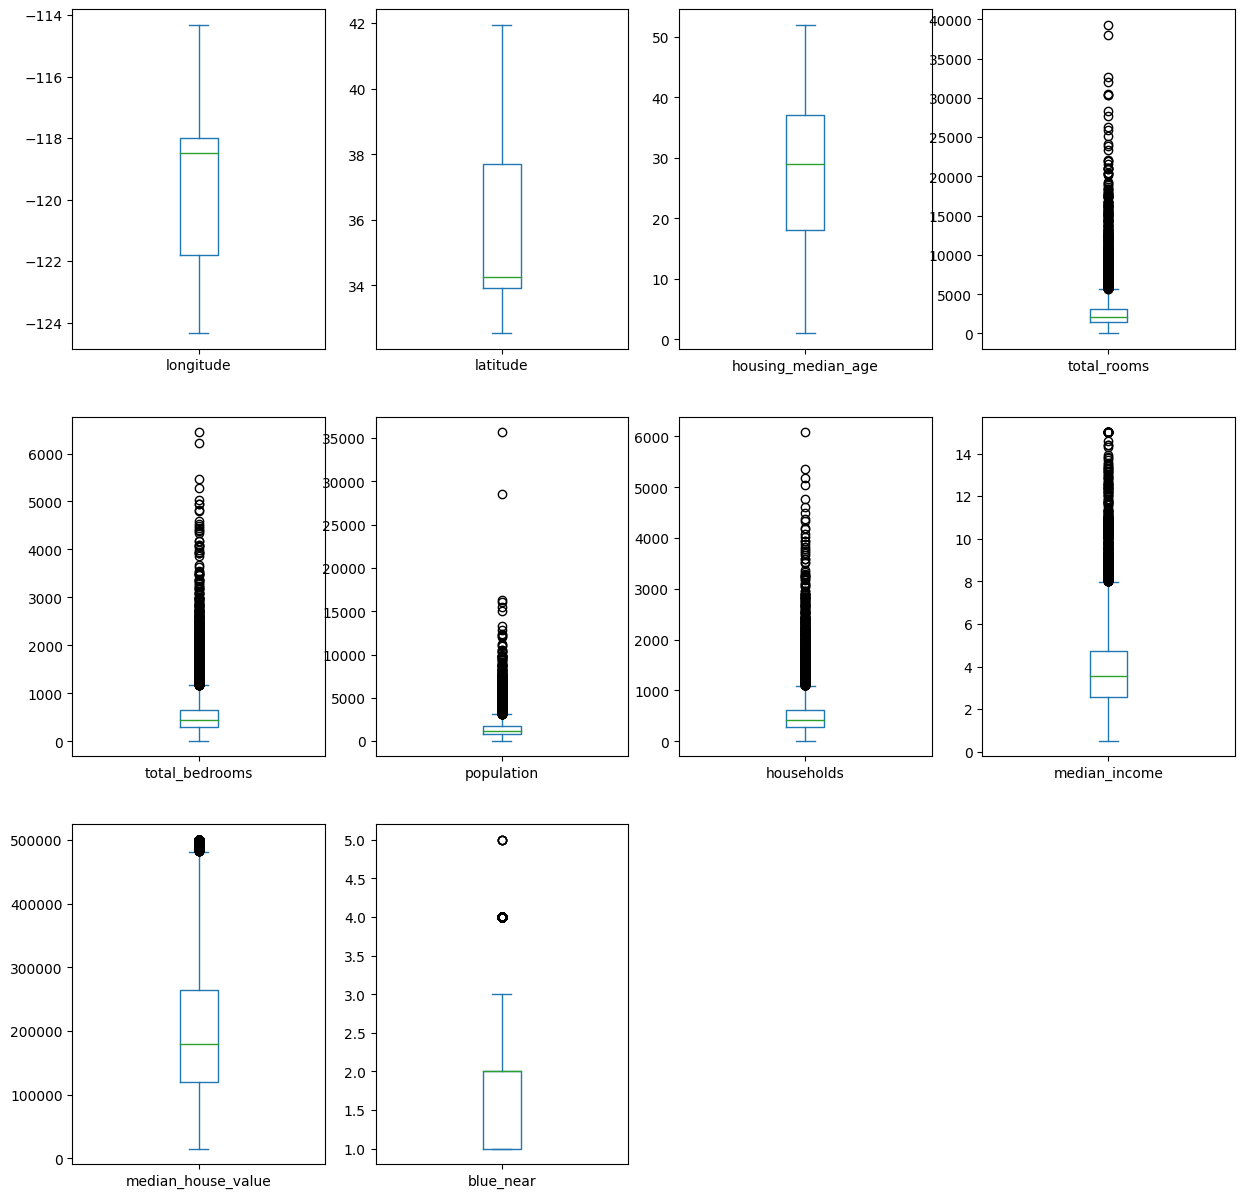

In [14]:
data.plot(kind = "box", subplots = True, layout = (3,4), figsize = (15,15))

In [15]:
# we can see, we get outliers in almost every features


# Check out features distribution

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'blue_near'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

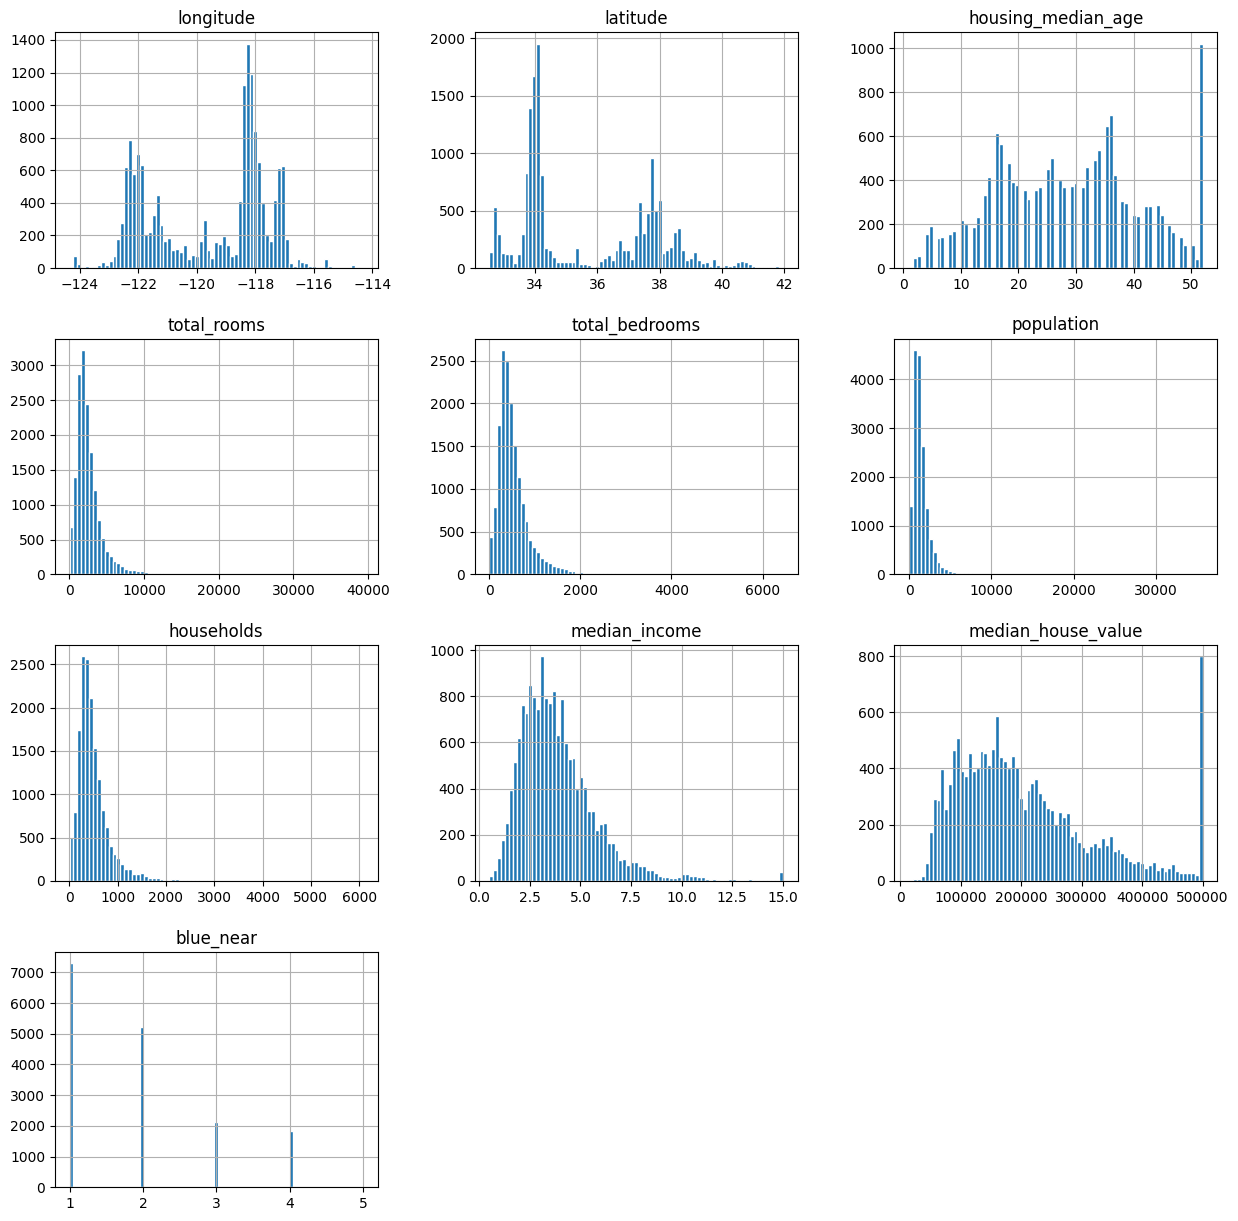

In [16]:
data.hist(bins = 75, figsize = (15,15), edgecolor = "white")

In [17]:
# as we can see, our features have not a normal distribution, so we need to be carefull if using arithmetics tools

# Remplacing missing values

In [18]:
# As we don't want to drop the missing values in "total_bedrooms", we will remplace them by the mean value

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(data)
data = pd.DataFrame(x, columns=data.columns, index=data.index)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   blue_near           16512 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [ ]:
# we can see we have no more missing values.
# we are ready to fit our model